In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# prepare the data for the train

In [10]:
X_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 1)


for img in glob.glob(r"/content/drive/MyDrive/datasets2/Covid19-dataset/train/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 2)

# Prepare and load data Test

In [15]:
X_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 2)

In [16]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D



# Build the network

In [54]:

model = Sequential()
model.add(Conv2D(16, 3, input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [55]:
model.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)        

# train the model 

In [56]:
history = model.fit( X_train, y_train, epochs = 100, verbose=1 ,  validation_split=0.2  )

Epoch 1/100
5/5 [==============================] - 1s 108ms/step - loss: 1.0646 - accuracy: 0.4054 - val_loss: 1.5164 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 24ms/step - loss: 0.9734 - accuracy: 0.4797 - val_loss: 1.3547 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.9287 - accuracy: 0.5878 - val_loss: 1.1671 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.7616 - accuracy: 0.7162 - val_loss: 1.8382 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.6776 - accuracy: 0.7162 - val_loss: 0.9822 - val_accuracy: 0.1579
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.6402 - accuracy: 0.7095 - val_loss: 0.4943 - val_accuracy: 0.8947
Epoch 7/100
5/5 [==============================] - 0s 21ms/step - loss: 0.4792 - accuracy: 0.8176 - val_loss: 0.8154 - val_accuracy: 0.5000
Epo

# plot the loss and the accuracy per epochs lineplot

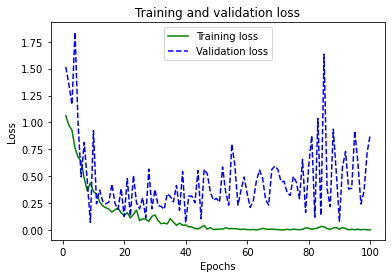

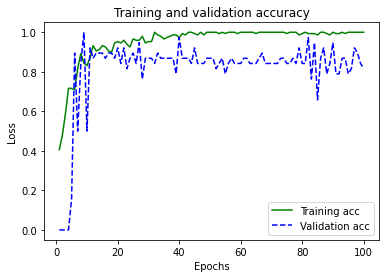

In [57]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', linestyle='dashed', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', linestyle='dashed', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()


# train & test loss and accuracy

In [58]:
score = model.evaluate(X_train , y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy: ', score[1]*100.0 ,'%')

Train loss: 0.18080854415893555
Train accuracy:  96.23655676841736 %


In [59]:
score = model.evaluate(X_test , y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0 ,'%')

Test loss: 0.8106009364128113
Test accuracy:  86.53846383094788 %
